# Quantum vs Classical: Breaking RSA Encryption

This notebook compares how long it would take for **quantum computers** (using Shor's algorithm) versus **classical computers** (using the General Number Field Sieve) to break RSA encryption of various key sizes.

**Key Concepts:**
- **Classical Attack**: General Number Field Sieve (GNFS) - Best known classical factoring algorithm
- **Quantum Attack**: Shor's Algorithm - Exponentially faster on quantum computers
- **RSA Security**: Based on the difficulty of factoring large numbers into primes

## Setup

Import required libraries for calculations and visualization.

In [5]:
import math
import matplotlib.pyplot as plt
import numpy as np

print("✓ Libraries imported successfully!")

✓ Libraries imported successfully!


## Complexity Functions

Define the mathematical complexity for both classical and quantum attacks.

In [6]:
"""
Quantum : O(n^2 * log(n) * log(log(n)))
Classical : O(exp((64/9 * ln(n))^(1/3) * (ln(ln(n)))^(2/3)))
"""

def classical_operations(n):
    """
    Classical attack using General Number Field Sieve (GNFS)
    Complexity: O(exp((64/9 * ln(n))^(1/3) * (ln(ln(n)))^(2/3)))
    
    Simplified: O(exp(1.923 * (ln(n))^(1/3) * (ln(ln(n)))^(2/3)))
    """
    ln_n = math.log(n)
    ln_ln_n = math.log(ln_n)
    
    exponent = 1.923 * (ln_n ** (1/3)) * (ln_ln_n ** (2/3))
    operations = math.exp(exponent)
    
    return operations

def quantum_operations(n):
    """
    Quantum attack using Shor's Algorithm
    Complexity: O(n^2 * log(n) * log(log(n)))
    
    For factoring an n-bit number:
    - Gate operations: O(n^2 * log(n))
    - Uses quantum gates efficiently
    """
    bit_length = n.bit_length()
    operations = (bit_length ** 2) * math.log(bit_length) * math.log(math.log(bit_length + 1) + 1)
    
    return operations

def estimate_time(operations, operations_per_second):
    """
    Convert operations to human-readable time
    """
    seconds = operations / operations_per_second
    
    if seconds < 60:
        return f"{seconds:.2f} seconds"
    elif seconds < 3600:
        return f"{seconds/60:.2f} minutes"
    elif seconds < 86400:
        return f"{seconds/3600:.2f} hours"
    elif seconds < 31536000:
        return f"{seconds/86400:.2f} days"
    else:
        years = seconds / 31536000
        if years < 1e6:
            return f"{years:.2e} years"
        elif years < 1e12:
            return f"{years/1e6:.2e} million years"
        elif years < 1e18:
            return f"{years/1e12:.2e} trillion years"
        else:
            return f"{years/1e18:.2e} quintillion years"

print("✓ Complexity functions defined!")
print("\nClassical: GNFS with sub-exponential complexity")
print("Quantum: Shor's Algorithm with polynomial complexity")

✓ Complexity functions defined!

Classical: GNFS with sub-exponential complexity
Quantum: Shor's Algorithm with polynomial complexity


## Input RSA Key Size

Enter the RSA key size you want to analyze (e.g., 1024, 2048, 4096).

In [7]:
# Get RSA key size from user
key_size_input = input("Enter RSA key size in bits (e.g., 512, 1024, 2048, 4096): ")

try:
    key_size = int(key_size_input)
    
    if key_size < 8:
        print("⚠️  Key size too small! Using minimum of 8 bits for demonstration.")
        key_size = 8
    elif key_size > 16384:
        print("⚠️  Key size very large! This may take time to compute.")
    
    # Calculate the actual number being factored (2^key_size - 1 as approximation)
    n = 2 ** key_size - 1
    
    print(f"\n{'='*70}")
    print(f"RSA-{key_size} Analysis")
    print(f"{'='*70}")
    print(f"Key size: {key_size} bits")
    print(f"Number to factor: ~2^{key_size} (approximately {key_size} decimal digits)")
    print(f"{'='*70}\n")
    
except ValueError:
    print("❌ Invalid input! Please enter a number.")
    key_size = None
    n = None


RSA-2048 Analysis
Key size: 2048 bits
Number to factor: ~2^2048 (approximately 2048 decimal digits)



## Calculate Operations Required

Compute the number of operations needed for both classical and quantum attacks.

In [8]:
if key_size and n:
    # Calculate operations for both methods
    classical_ops = classical_operations(n)
    quantum_ops = quantum_operations(n)
    
    # Calculate speedup factor
    speedup = classical_ops / quantum_ops
    
    print(f"{'='*70}")
    print("OPERATIONS REQUIRED")
    print(f"{'='*70}\n")
    
    print(f"Classical Computer (GNFS):")
    print(f"  Operations: {classical_ops:.2e}")
    print()
    
    print(f"Quantum Computer (Shor's Algorithm):")
    print(f"  Operations: {quantum_ops:.2e}")
    print()
    
    print(f"{'─'*70}")
    print(f"Speedup Factor: {speedup:.2e}x faster with quantum")
    print(f"{'─'*70}\n")
else:
    print("⚠️  Please enter a valid key size first!")

OPERATIONS REQUIRED

Classical Computer (GNFS):
  Operations: 1.53e+35

Quantum Computer (Shor's Algorithm):
  Operations: 6.89e+07

──────────────────────────────────────────────────────────────────────
Speedup Factor: 2.22e+27x faster with quantum
──────────────────────────────────────────────────────────────────────



## Time Estimates

Convert operations to real-world time estimates based on computer speeds.

In [9]:
if key_size and n:
    # Computer performance assumptions
    classical_computer_speed = 1e12  # 1 trillion operations/second (modern supercomputer)
    quantum_computer_speed = 220000  # 220K CLOPS (IBM Quantum - Circuit Layer Operations Per Second)
    
    # Calculate time estimates
    classical_time_seconds = classical_ops / classical_computer_speed
    quantum_time_seconds = quantum_ops / quantum_computer_speed
    
    classical_time_str = estimate_time(classical_ops, classical_computer_speed)
    quantum_time_str = estimate_time(quantum_ops, quantum_computer_speed)
    
    print(f"{'='*70}")
    print("TIME TO BREAK RSA")
    print(f"{'='*70}\n")
    
    print(f"Classical Computer (Modern Supercomputer @ 1 trillion ops/sec):")
    print(f"  Time Required: {classical_time_str}")
    print()
    
    print(f"Quantum Computer (IBM Quantum @ 220K CLOPS):")
    print(f"  Time Required: {quantum_time_str}")
    print()
    
    # Time speedup
    time_speedup = classical_time_seconds / quantum_time_seconds
    print(f"{'─'*70}")
    print(f"Time Speedup: {time_speedup:.2e}x faster with quantum")
    print(f"{'─'*70}\n")
    
    # Security assessment
    print(f"{'='*70}")
    print("SECURITY ASSESSMENT")
    print(f"{'='*70}\n")
    
    if classical_time_seconds > 31536000 * 100:  # More than 100 years
        print(f"✓ RSA-{key_size} is SECURE against classical attacks")
        print(f"  (Would take more than 100 years with current technology)")
    else:
        print(f"⚠️  RSA-{key_size} is VULNERABLE to classical attacks")
        print(f"  (Can be broken in less than 100 years)")
    
    print()
    
    if quantum_time_seconds > 31536000:  # More than 1 year
        print(f"✓ RSA-{key_size} currently resistant to quantum attacks")
        print(f"  (Would still take significant time with current quantum tech)")
    else:
        print(f"❌ RSA-{key_size} is VULNERABLE to quantum attacks")
        print(f"  (Can be broken quickly with a sufficiently large quantum computer)")
    
    print(f"\n{'='*70}\n")
    
else:
    print("⚠️  Please enter a valid key size first!")

TIME TO BREAK RSA

Classical Computer (Modern Supercomputer @ 1 trillion ops/sec):
  Time Required: 4.86e+03 trillion years

Quantum Computer (IBM Quantum @ 220K CLOPS):
  Time Required: 5.22 minutes

──────────────────────────────────────────────────────────────────────
Time Speedup: 4.89e+20x faster with quantum
──────────────────────────────────────────────────────────────────────

SECURITY ASSESSMENT

✓ RSA-2048 is SECURE against classical attacks
  (Would take more than 100 years with current technology)

❌ RSA-2048 is VULNERABLE to quantum attacks
  (Can be broken quickly with a sufficiently large quantum computer)




## Visualization

Compare classical vs quantum attack complexity across different key sizes.

Computing complexity for multiple key sizes...
✓ Visualization saved as 'rsa_quantum_vs_classical.png'


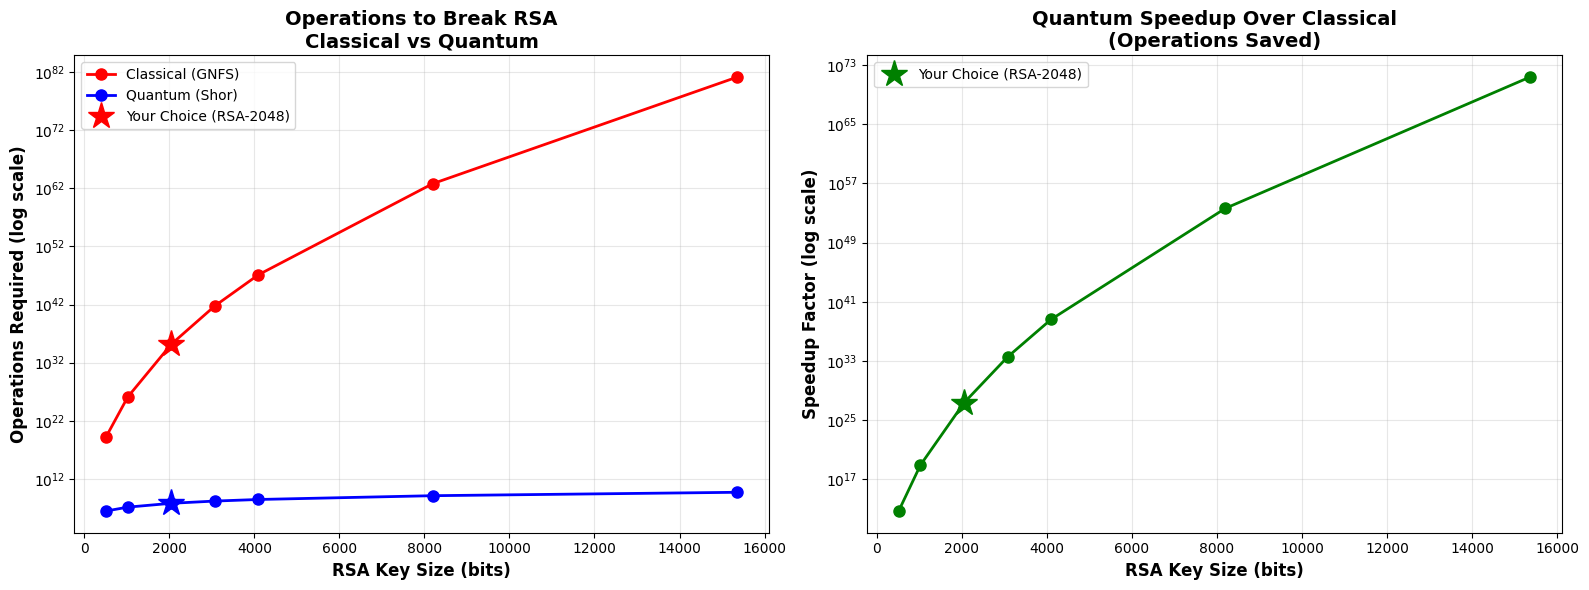


KEY TAKEAWAY
As key sizes increase:
  • Classical attacks become exponentially harder
  • Quantum attacks scale polynomially (much slower growth)
  • The quantum advantage becomes more dramatic



In [10]:
if key_size and n:
    # Create range of key sizes for comparison
    key_sizes = [512, 1024, 2048, 3072, 4096, 8192, 15360]
    classical_ops_list = []
    quantum_ops_list = []
    
    print("Computing complexity for multiple key sizes...")
    
    for ks in key_sizes:
        n_temp = 2 ** ks - 1
        classical_ops_list.append(classical_operations(n_temp))
        quantum_ops_list.append(quantum_operations(n_temp))
    
    # Create visualization
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Plot 1: Operations comparison (log scale)
    ax1.plot(key_sizes, classical_ops_list, 'ro-', linewidth=2, markersize=8, label='Classical (GNFS)')
    ax1.plot(key_sizes, quantum_ops_list, 'bo-', linewidth=2, markersize=8, label='Quantum (Shor)')
    
    # Highlight the user's chosen key size
    if key_size in key_sizes:
        idx = key_sizes.index(key_size)
        ax1.plot(key_size, classical_ops_list[idx], 'r*', markersize=20, label=f'Your Choice (RSA-{key_size})')
        ax1.plot(key_size, quantum_ops_list[idx], 'b*', markersize=20)
    
    ax1.set_yscale('log')
    ax1.set_xlabel('RSA Key Size (bits)', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Operations Required (log scale)', fontsize=12, fontweight='bold')
    ax1.set_title('Operations to Break RSA\nClassical vs Quantum', fontsize=14, fontweight='bold')
    ax1.grid(True, alpha=0.3)
    ax1.legend(fontsize=10)
    
    # Plot 2: Speedup factor
    speedups = [classical_ops_list[i] / quantum_ops_list[i] for i in range(len(key_sizes))]
    ax2.plot(key_sizes, speedups, 'go-', linewidth=2, markersize=8)
    
    if key_size in key_sizes:
        idx = key_sizes.index(key_size)
        ax2.plot(key_size, speedups[idx], 'g*', markersize=20, label=f'Your Choice (RSA-{key_size})')
    
    ax2.set_yscale('log')
    ax2.set_xlabel('RSA Key Size (bits)', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Speedup Factor (log scale)', fontsize=12, fontweight='bold')
    ax2.set_title('Quantum Speedup Over Classical\n(Operations Saved)', fontsize=14, fontweight='bold')
    ax2.grid(True, alpha=0.3)
    ax2.legend(fontsize=10)
    
    plt.tight_layout()
    plt.savefig('rsa_quantum_vs_classical.png', dpi=300, bbox_inches='tight')
    print("✓ Visualization saved as 'rsa_quantum_vs_classical.png'")
    plt.show()
    
    print(f"\n{'='*70}")
    print("KEY TAKEAWAY")
    print(f"{'='*70}")
    print("As key sizes increase:")
    print("  • Classical attacks become exponentially harder")
    print("  • Quantum attacks scale polynomially (much slower growth)")
    print("  • The quantum advantage becomes more dramatic")
    print(f"{'='*70}\n")
    
else:
    print("⚠️  Please enter a valid key size first!")

## Summary

**Understanding the Results:**

1. **Classical Attack (GNFS)**: The General Number Field Sieve is the fastest known classical algorithm for factoring large numbers. It has sub-exponential complexity, meaning it gets exponentially harder as key sizes increase.

2. **Quantum Attack (Shor's Algorithm)**: Runs on a quantum computer and has polynomial complexity. This means it scales much more gracefully with key size.

3. **Security Implications**: 
   - RSA-1024 can potentially be broken by powerful quantum computers in reasonable time
   - RSA-2048 is currently recommended minimum (secure against classical, resistant to near-term quantum)
   - RSA-4096+ provides extra security margin but with performance costs

4. **Why This Matters**: When large-scale quantum computers become available, current RSA encryption will be vulnerable. This is driving the development of post-quantum cryptography.

**Try different key sizes** (512, 1024, 2048, 4096, 8192) **to see how the security changes!**